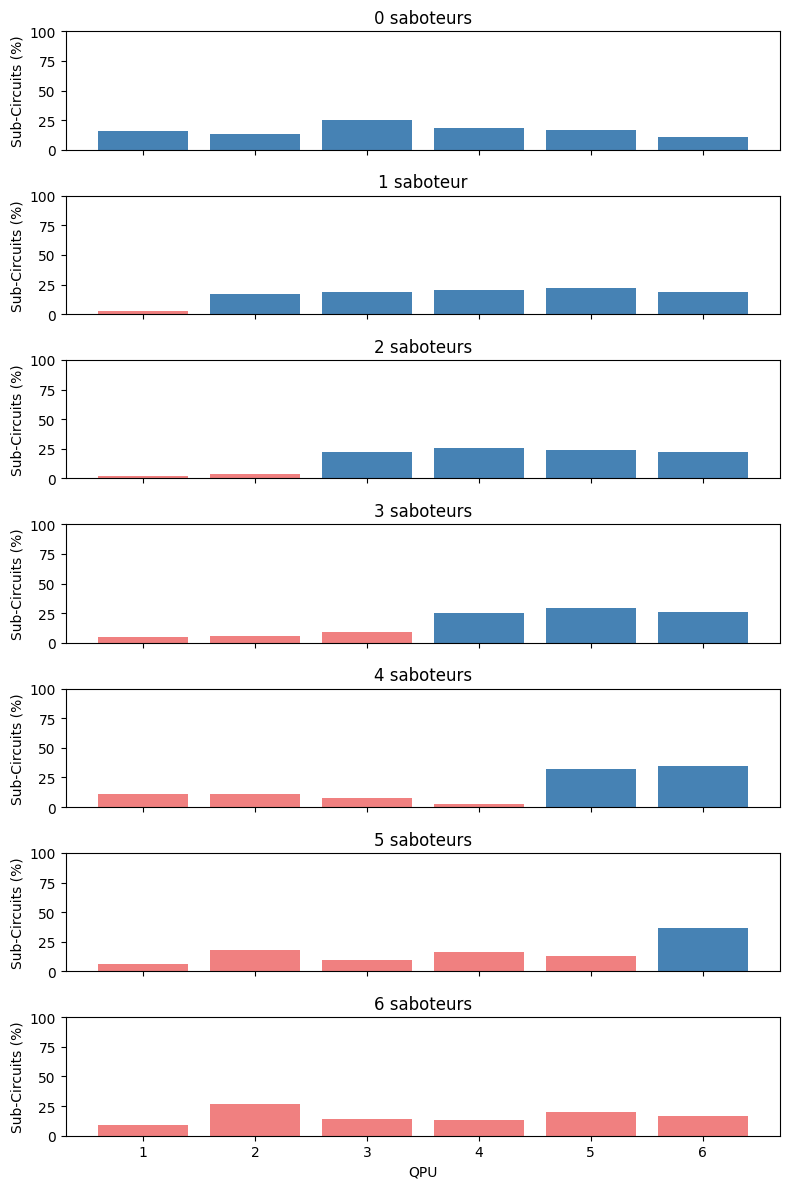

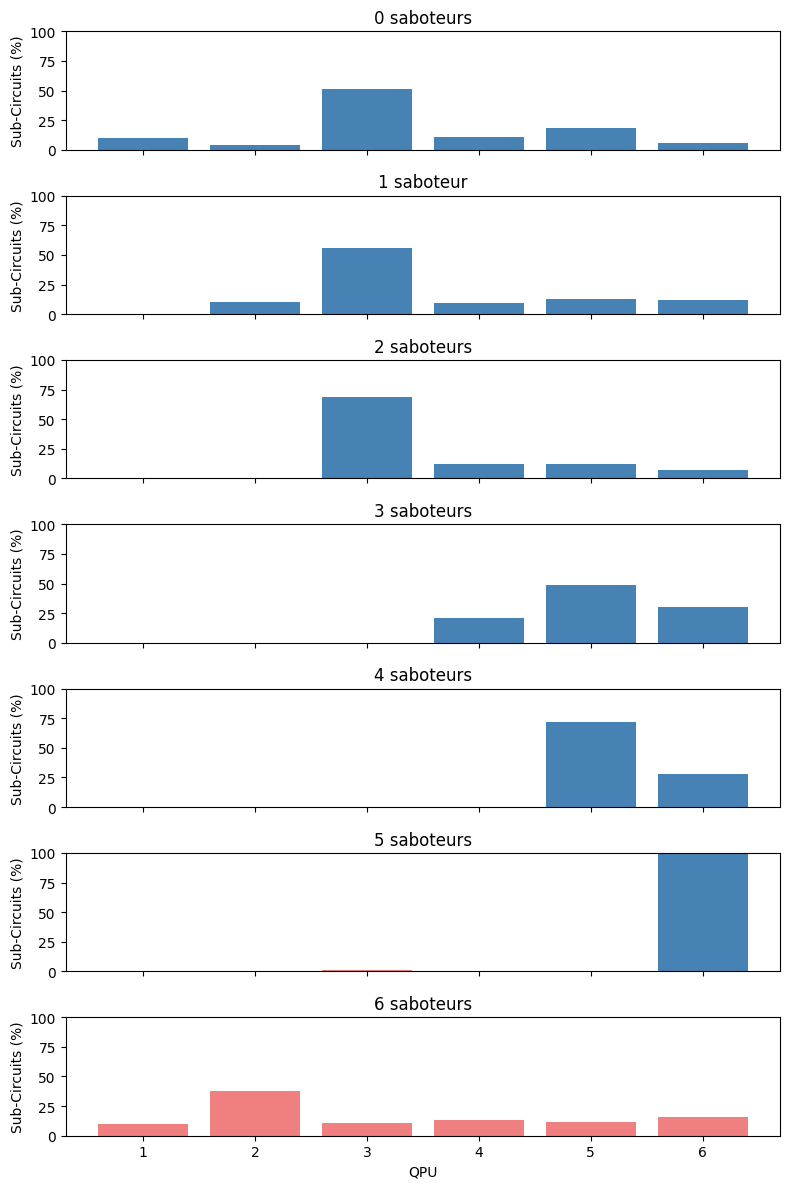

In [24]:
import random

import matplotlib.pyplot as plt
import numpy as np


def proportional(integrity_scores):
    tot = sum(integrity_scores)
    return [integrity_scores[i] / tot for i in range(6)]


def exponential(integrity_scores):
    qpu_weights = [np.exp(integrity_scores[i]) for i in range(6)]
    total_weight = sum(qpu_weights)
    return [weight / total_weight for weight in qpu_weights]

def assign(probs, subcircuits, redundancy_factor):
    qpus = list(range(6))
    assignments = []
    for saboteurs in range(7):
        a = [0, 0, 0, 0, 0, 0]
        for i in range(subcircuits):
            assigned_qpus = set()
            while len(assigned_qpus) < redundancy_factor:
                selected_qpu = random.choices(qpus, weights=probs[saboteurs], k=1)[0]
                if selected_qpu not in assigned_qpus:
                    assigned_qpus.add(selected_qpu)
                    a[selected_qpu] += 1
        a = [x * 100 / (subcircuits * redundancy_factor) for x in a]
        assignments.append(a)
    return assignments


def draw(data):
    fig, axes = plt.subplots(7, 1, figsize=(8, 12), sharex=True)
    x = np.arange(1, 7)
    for i, ax in enumerate(axes):
        colors = ["lightcoral" if j < i else "steelblue" for j in range(len(x))]
        ax.bar(x, data[i], color=colors, label=f"Chart {i + 1}")
        ax.set_title(f"{i} saboteur{'' if i == 1 else 's'}")
        if i == 6:
            ax.set_xlabel("QPU")
        ax.set_ylabel("Sub-Circuits (%)")
        ax.set_ylim(0, 100)
    plt.tight_layout()
    plt.show()


def table(scores, probs):
    print(probs)
    table = r"""
\begin{table}[h!]
\centering
\begin{tabular}{||c c||} 
 \hline
 Saboteurs & QPU 0 & QPU 1 & QPU 2 & QPU 3 & QPU 4 & QPU 5\\ [0.5ex] 
 \hline\hline
 0 & 0 \\
"""

    for saboteurs in range(7):
        table += f" {saboteurs+1}"
        for i in range(6):
            table += f" & {scores[i]:0.3f} / {probs[saboteurs][i]:0.3f}"
        table += r" \\"
        table += "\n"

    table += r""" [1ex]
 \hline
\end{tabular}
\caption{Table to test captions and labels.}
\label{table:sub-circuit-probabilities-1}
\end{table}
"""
    print(table)

integrity_scores = [7 + random.random() * 3 for i in range(6)]
probs = [proportional(integrity_scores)]
eprobs = [exponential(integrity_scores)]
for saboteurs in range(6):
    integrity_scores[saboteurs] = 1 + random.random() * 2
    probs.append(proportional(integrity_scores))
    eprobs.append(exponential(integrity_scores))
# PROBS ARRAYS:
# An array of 7 elements: 0 saboteurs, 1 saboteur, ..., 6 saboteurs
# Each element is a 6 element array with assignment probability

prop_assign = assign(probs, 100, 1)
exp_assign = assign(eprobs, 100, 1)
draw(prop_assign)
draw(exp_assign)
#table(integrity_scores, probs)
#table(integrity_scores, eprobs)